In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [23]:
from PIL import Image
img = np.array(Image.open(r"U:\Pytorch\CNN\The_GPD\Cherry\train\Cherry___healthy\33059.jpg"))
print(f"Shape: {img.shape}")  # Will show (height, width, channels)

Shape: (256, 256, 3)


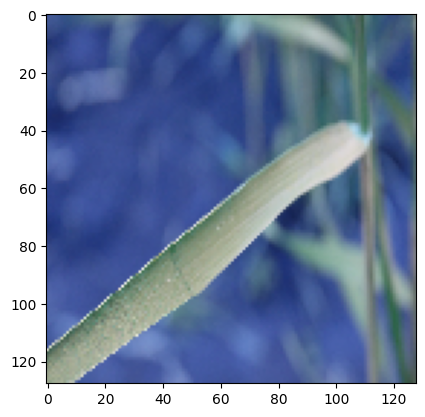

In [65]:
TRAIN_DATADIR = r"U:\Pytorch\CNN\The_GPD\Wheat\train"
CATEGORIES = [
    "wheat_Healthy",
    "wheat_septoria",
    "wheat_stripe_rust"
    ]

for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(128,128))
        plt.imshow(new_array)
        plt.show()
        break
    break



In [66]:
training_data = []
val_data = []

def create_dataset(DATADIR):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(128,128))
            if DATADIR == TRAIN_DATADIR:
                training_data.append([new_array,class_num])
            else:
                val_data.append([new_array,class_num])




In [67]:
create_dataset(TRAIN_DATADIR)
print(len(training_data))
random.shuffle(training_data)

407


In [68]:
for sample in training_data:
    sample[1] = np.array(sample[1])
    sample[0] = np.array(sample[0]).transpose(2,0,1)


train_data = []
train_label = []

for features,labels in training_data:
    train_data.append(features)
    train_label.append(labels)

train_data = np.array(train_data)
train_label = np.array(train_label)

print(train_data.shape)
print(train_label.shape)


pickle_out = open("wheat_data.pickle","wb")
pickle.dump(train_data,pickle_out)
pickle_out.close()

pickle_out = open("wheat_label.pickle","wb")
pickle.dump(train_label,pickle_out)
pickle_out.close()



(407, 3, 128, 128)
(407,)
